In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing initial data
unprocessed_df=pd.read_csv(r'data.csv')
display(unprocessed_df.head())
display(unprocessed_df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

In [3]:
# Working with skips
unprocessed_df['children'] = unprocessed_df['children'].fillna(0)
unprocessed_df['country'] = unprocessed_df['country'].fillna('NA')
unprocessed_df['agent'] = unprocessed_df['agent'].fillna(-1)
unprocessed_df['company'] = unprocessed_df['company'].fillna(-1)

# Counting unique values
print(unprocessed_df['children'].value_counts())
print(unprocessed_df['country'].value_counts())
print(unprocessed_df['agent'].value_counts())
print(unprocessed_df['company'].value_counts())

# Working with duplicates
print(unprocessed_df.duplicated().sum())
unprocessed_df = unprocessed_df.drop_duplicates()
print(unprocessed_df.duplicated().sum())

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 178, dtype: int64
agent
 9.0      31961
-1.0      16340
 240.0    13922
 1.0       7191
 14.0      3640
          ...  
 280.0        1
 285.0        1
 289.0        1
 265.0        1
 497.0        1
Name: count, Length: 334, dtype: int64
company
-1.0      112593
 40.0        927
 223.0       784
 67.0        267
 45.0        250
           ...  
 32.0          1
 11.0          1
 487.0         1
 101.0         1
 376.0         1
Name: count, Length: 353, dtype: int64
31994
0


In [4]:
# Data normalization
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(unprocessed_df['adr'].values.reshape(-1, 1))
unprocessed_df['adr_normalised'] = min_max_scaler.transform(unprocessed_df['adr'].values.reshape(-1, 1))

In [5]:
# Creating a column with a date
unprocessed_df['arrival_date_month_num'] = unprocessed_df.apply(lambda row: datetime.datetime.strptime(row['arrival_date_month'], '%B').month, axis=1)
unprocessed_df['date'] = unprocessed_df.apply(lambda row: datetime.date(year=row['arrival_date_year'], day=row['arrival_date_day_of_month'], month=row['arrival_date_month_num']), axis=1)

# Deleting useless columns
del unprocessed_df['arrival_date_year']
del unprocessed_df['arrival_date_month']
del unprocessed_df['arrival_date_week_number']
del unprocessed_df['arrival_date_day_of_month']
del unprocessed_df['arrival_date_month_num']

In [6]:
unprocessed_df.corr(numeric_only=True)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_normalised
is_canceled,1.000000,0.184806,0.060191,0.082928,0.081816,0.067369,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,-0.000482,-0.074906,0.004464,0.127986,-0.184206,-0.120545,0.127986
lead_time,0.184806,1.000000,0.235145,0.310129,0.140493,0.028650,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.081004,-0.079429,0.132152,0.023564,-0.086541,0.034240,0.023564
stays_in_weekend_nights,0.060191,0.235145,1.000000,0.555552,0.088284,0.028561,0.013668,-0.106948,-0.020636,-0.056653,0.050316,0.158728,-0.090666,-0.031680,0.038972,-0.042920,0.032396,0.038972
stays_in_week_nights,0.082928,0.310129,0.555552,1.000000,0.095577,0.030479,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.190337,-0.065972,0.001905,0.053298,-0.044303,0.037823,0.053298
adults,0.081816,0.140493,0.088284,0.095577,1.000000,0.023712,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,0.030199,-0.174918,-0.015740,0.248999,0.007802,0.112772,0.248999
children,0.067369,0.028650,0.028561,0.030479,0.023712,1.000000,0.017423,-0.045651,-0.019208,-0.029423,0.031313,0.042168,-0.051157,-0.020419,0.326293,0.036332,0.044596,0.326293
babies,-0.020543,-0.003614,0.013668,0.016009,0.016640,0.017423,1.000000,-0.012977,-0.005395,-0.009193,0.081035,0.028899,-0.011460,-0.006840,0.023446,0.030885,0.094820,0.023446
is_repeated_guest,-0.089643,-0.147003,-0.106948,-0.113543,-0.171714,-0.045651,-0.012977,1.000000,0.206374,0.441456,0.006047,-0.065988,0.199011,-0.012816,-0.153040,0.072019,-0.001321,-0.153040
previous_cancellations,0.051468,0.005375,-0.020636,-0.018781,-0.042097,-0.019208,-0.005395,0.206374,1.000000,0.392064,-0.010269,-0.033102,0.028562,0.003682,-0.050267,-0.003399,0.001871,-0.050267
previous_bookings_not_canceled,-0.052154,-0.078931,-0.056653,-0.058503,-0.120914,-0.029423,-0.009193,0.441456,0.392064,1.000000,0.005420,-0.058659,0.130948,-0.006304,-0.085721,0.040872,0.027112,-0.085721


In [7]:
# Exploring data
df = unprocessed_df.copy()
df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights
count,87396.000000,87396.000000,87396.000000
mean,79.891368,1.005263,2.625395
std,86.052325,1.031921,2.053584
min,0.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000
50%,49.000000,1.000000,2.000000
75%,125.000000,2.000000,4.000000
max,737.000000,19.000000,50.000000


<Axes: xlabel='lead_time', ylabel='Count'>

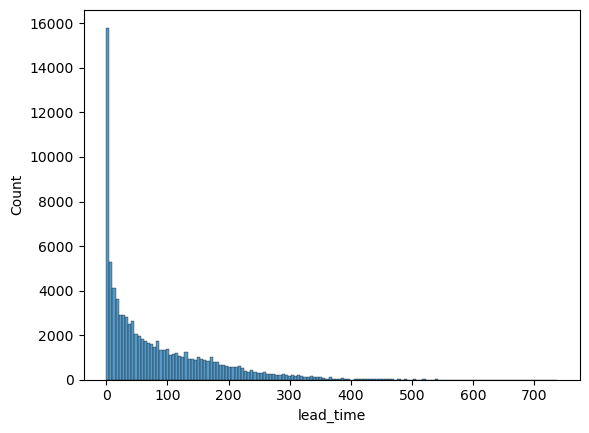

In [8]:
sns.histplot(df.lead_time)

<Axes: xlabel='stays_in_weekend_nights', ylabel='Count'>

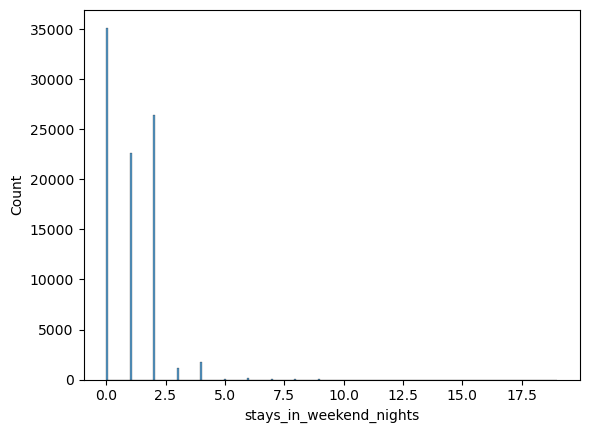

In [9]:
sns.histplot(df.stays_in_weekend_nights)

<Axes: xlabel='stays_in_week_nights', ylabel='Count'>

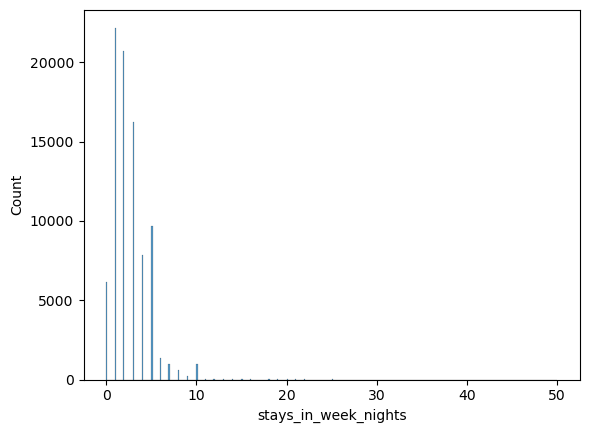

In [10]:
sns.histplot(df.stays_in_week_nights)

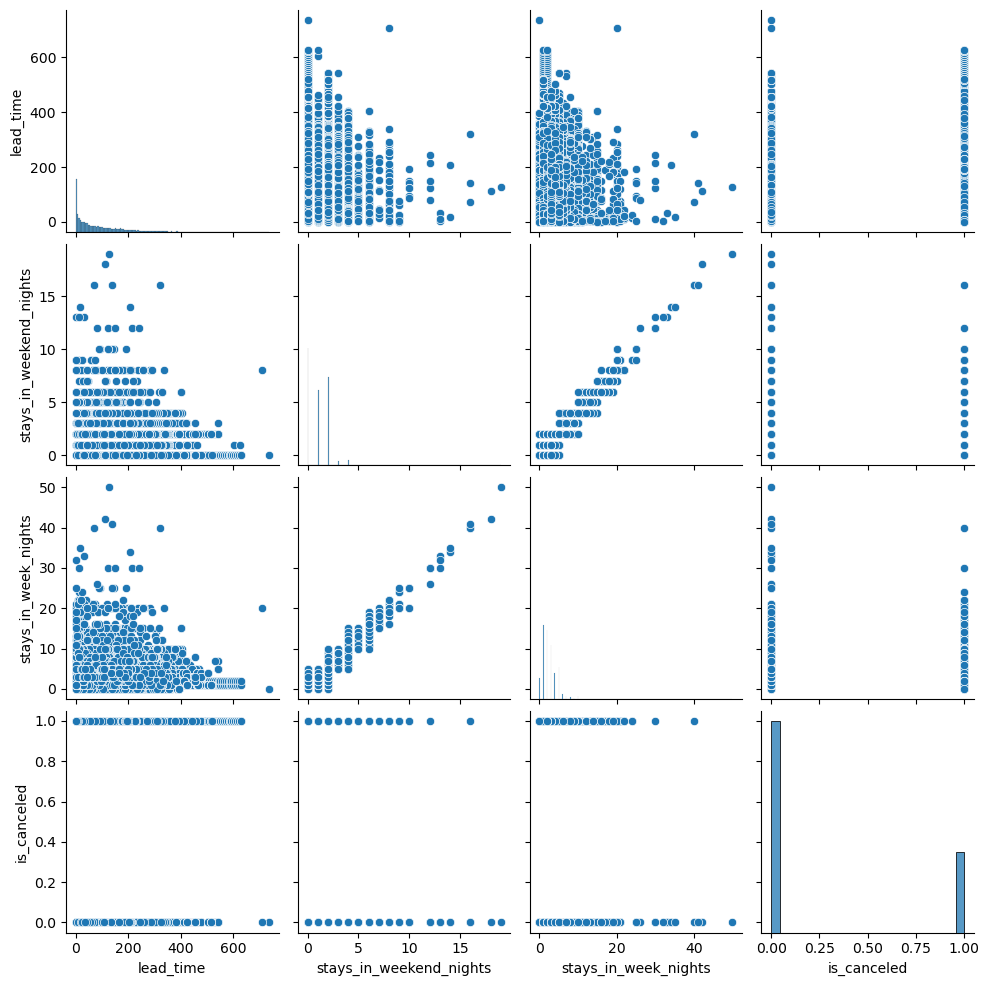

In [11]:
sns.pairplot(df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']])

<Axes: >

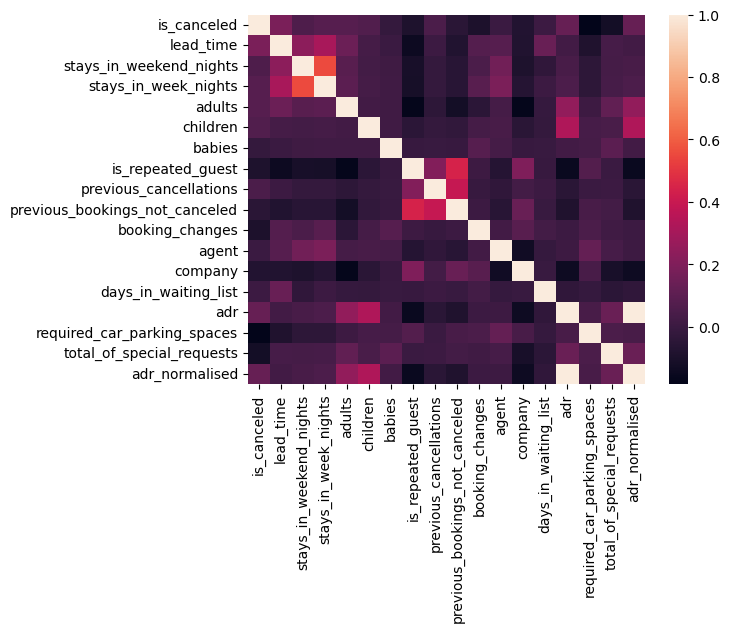

In [12]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='lead_time'>

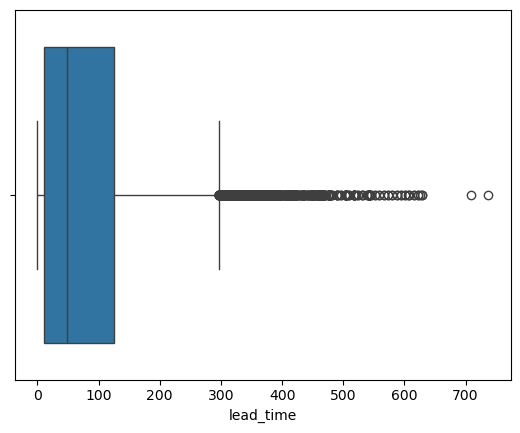

In [13]:
sns.boxplot(x=df['lead_time'])

<Axes: xlabel='stays_in_weekend_nights'>

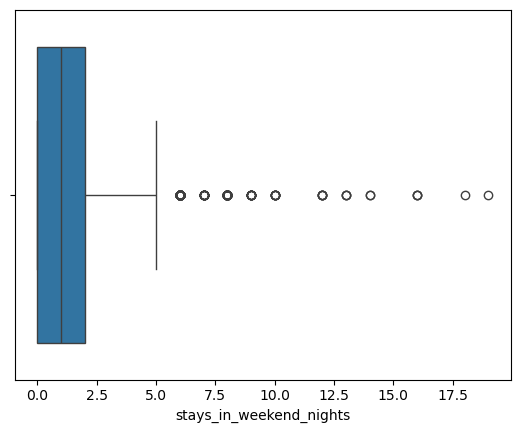

In [14]:
sns.boxplot(x=df['stays_in_weekend_nights'])

<Axes: xlabel='stays_in_week_nights'>

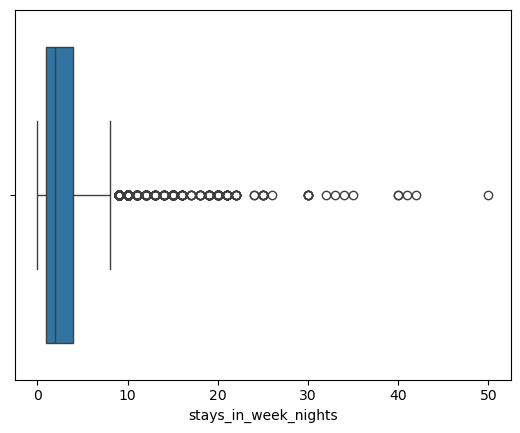

In [15]:
sns.boxplot(x=df['stays_in_week_nights'])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

X = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']]
Y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

log_reg.fit(X_train, y_train.values.ravel())

Y_predicted = log_reg.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, Y_predicted))

Accuracy: 0.72
